<a href="https://colab.research.google.com/github/QuratulAin20/Machine-Learning/blob/main/Kindle_Review_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv("/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/preprocessed_kindle_review .csv")

In [ ]:
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
df.shape

(12000, 4)

In [5]:
data = df.iloc[:,1:3]

In [6]:
data

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."
...,...,...
11995,2,Had to read certain passages twice--typos. Wi...
11996,3,Not what i expected. yet a very interesting bo...
11997,5,Dragon Knights is a world where Knights ride d...
11998,4,"Since this story is very short, it's hard to s..."


In [ ]:
data.isnull().sum()

rating        0
reviewText    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      12000 non-null  int64 
 1   reviewText  12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['rating'].unique()

array([5, 1, 4, 3, 2])

In [ ]:
# checking whether the data is imbalanced
counts = data['rating'].value_counts()

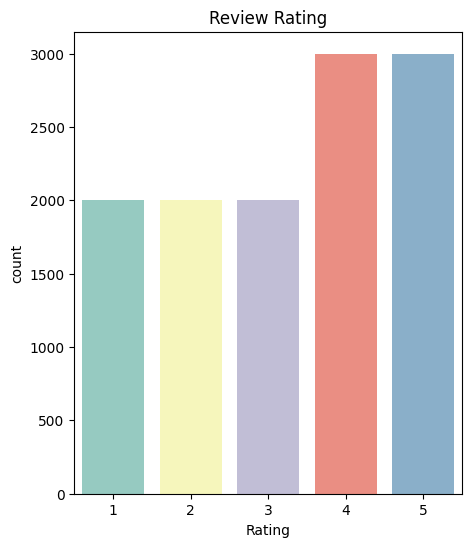

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(x=counts.index , y=counts.values, palette='Set3')
plt.title('Review Rating')
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

## Preprocessing

In [7]:
data['rating']=data['rating'].apply(lambda x:0 if x<3 else 1)

In [ ]:
data

,rating,reviewText
0,1,This book was the very first bookmobile book I...
1,0,"When I read the description for this book, I c..."
2,1,I just had to edit this review. This book is a...
3,1,I don't normally buy 'mystery' novels because ...
4,1,"This isn't the kind of book I normally read, a..."
...,...,...
11995,0,Had to read certain passages twice--typos. Wi...
11996,1,Not what i expected. yet a very interesting bo...
11997,1,Dragon Knights is a world where Knights ride d...
11998,1,"Since this story is very short, it's hard to s..."


In [ ]:
data['rating'].unique()

array([1, 0])

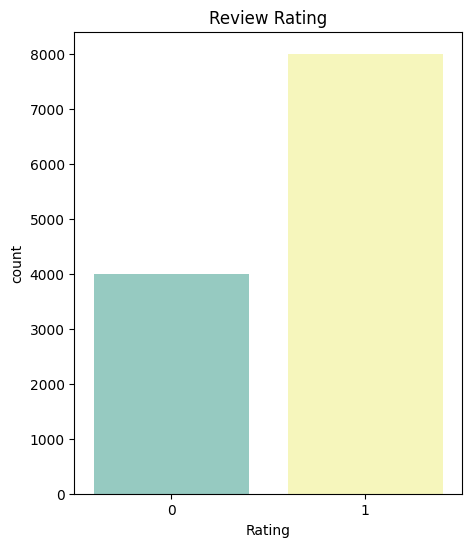

In [ ]:
counts=data['rating'].value_counts()
plt.figure(figsize=(5,6))
sns.barplot(x=counts.index , y=counts.values, palette='Set3')
plt.title('Review Rating')
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

In [8]:
# lower case
data['reviewText'] = data['reviewText'].str.lower()

In [9]:
#data['reviewText'] = data['reviewText'].str.lower
# removing special character
data['reviewText']= data['reviewText'].apply(lambda x:re.sub('[^a-z A-Z 0-9]+',"",x))

#Removing url tags
data['reviewText']= data['reviewText'].apply(lambda x:re.sub(r'[\b(http|https|ftp)://?:\\/\\/(?:www\\.)\\b(?:()@:%_\\+.~#?&\\/=*)$]', '',str(x)))

# Removing html tags
data['reviewText']=data['reviewText'].apply(lambda x:BeautifulSoup(x, 'lxml').get_text())

# Removing additional spaces
data['reviewText']=data['reviewText'].apply(lambda x: " ".join(x.split()))

In [10]:
data.head()

,rating,reviewText
0,1,i ook a e very ir ookmoile ook i oug en i a in...
1,0,en i read e decriion or i ook i couldn ai o re...
2,1,i ju ad o edi i revie i ook i an i elieve i go...
3,1,i don normally uy myery novel ecaue i ju don l...
4,1,i in e kind o ook i normally read aloug i ry n...


# Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
lem = WordNetLemmatizer()

In [13]:
def lem_word(text):
    return " ".join([lem.lemmatize(word) for word in text.split()])

In [14]:
data['reviewText'] = data['reviewText'].apply(lambda x:lem_word(x))

In [15]:
data.head()

,rating,reviewText
0,1,i ook a e very ir ookmoile ook i oug en i a in...
1,0,en i read e decriion or i ook i couldn ai o re...
2,1,i ju ad o edi i revie i ook i an i elieve i go...
3,1,i don normally uy myery novel ecaue i ju don l...
4,1,i in e kind o ook i normally read aloug i ry n...


# Splittinng Data set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['reviewText'],data['rating'],test_size=0.2,random_state=42)

#Vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()

In [22]:
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow = bow.transform(X_test).toarray()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Model Training

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train_bow,y_train)

GaussianNB()

In [25]:
y_pred = model.predict(X_test_bow)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
accuracy_score_bow = accuracy_score(y_test,y_pred)
accuracy_score_bow


0.5770833333333333

In [29]:
model.fit(X_train_tfidf,y_train)

GaussianNB()

In [30]:
y_pred_tfidf = model.predict(X_test_tfidf)

In [31]:
accuracy_score_tfidf = accuracy_score(y_test,y_pred_tfidf)
accuracy_score_tfidf

0.5820833333333333